In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#Sequence Alignment with *O(m.n)* space and time

####Best sequence alignment for the words: "*ocurrance*" and "*occurrence*"

In [2]:
from edit_distance import sequence_alignemt
from edit_distance import get_sequence

x = "ocurrance"
y = "occurrence"
g = 0.7
a = 1

M, cost = sequence_alignemt(x, y, g, a)
out_x, out_y = get_sequence(x, y, g, a, M)

print "Cost: %.3f\nDiff:\n%s\n%s" % (cost, out_x, out_y)

Cost: 1.700
Diff:
o*curr<a>nce
occurr<e>nce


####Task 2 with O(m.n) space and time

In [5]:
from edit_distance import sequence_alignemt
from edit_distance import get_sequence
import subprocess
import os
import gc
import random
import resource
import numpy as np
import time
from math import log

z = "ABCD"
gamma = 0.7
alpha = 1
gc.disable()


def task2():
    gc.collect()
    result = [[],[],[]]
    for i in range(8):
        t = []
        m = []
        # Getting currante memory usage
        start_mem = memory_usage()
        size = 10*pow(2, i)
        for j in range(10):
            # Releasing unused memory
            gc.collect()
            # Getting current time
            start_time = time.clock()
            # Chain generation
            x = "".join([random.choice(z) for _ in range(size)])
            y = "".join([random.choice(z) for _ in range(size)])

            # Sequence Alignment
            M, cost = sequence_alignemt(x, y, g, a)
            out_x, out_y = get_sequence(x, y, g, a, M)

            elapsed = (time.clock() - start_time)/60
            used_men = memory_usage() - start_mem 
            t.append(elapsed)
            m.append(used_men)
            print "i = %d, j = %d\nElapsed Time: %.3f mins\nUsed memory: %.3f MB" % (i, j, elapsed, used_men)

            # Releasing unused memory
            del x, y, M, out_x, out_y
            gc.collect()
            if elapsed > 15:
                return result

        result[0].append(size)
        # Saves the mean time
        result[1].append(np.median(t))
        # Saves the mean of consumed memory
        result[2].append(np.median(m))
    return result


def memory_usage():
    # return the memory usage in MB
    out = subprocess.Popen(['ps', 'v', '-p', str(os.getpid())],
    stdout=subprocess.PIPE).communicate()[0].split(b'\n')
    vsz_index = out[0].split().index(b'RSS')
    mem = float(out[1].split()[vsz_index]) / 1024
    return mem

In [6]:
result = task2()

i = 0, j = 0
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 1
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 2
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 3
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 4
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 5
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 6
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 7
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 8
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 9
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 1, j = 0
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 1, j = 1
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 1, j = 2
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 1, j = 3
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 1, j = 4
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 1, j = 5
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 1, j = 6
Elapsed Time: 0.000 mins
Us

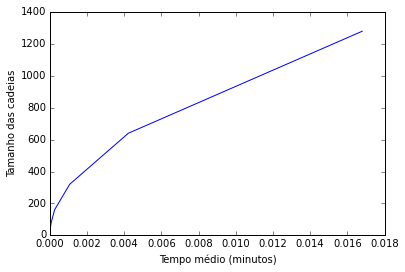

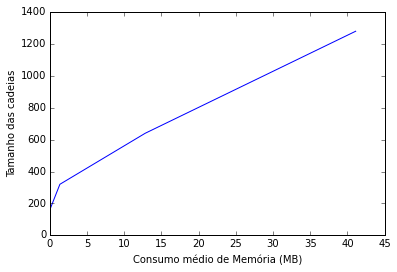

In [7]:
import matplotlib.pyplot as plt


plt.figure(1)
# Size X Time
plt.plot(result[1], result[0])
plt.xlabel(u"Tempo médio (minutos)")
plt.ylabel(u"Tamanho das cadeias")

# Size i X Memory
plt.figure(2)
plt.plot(result[2], result[0])
plt.xlabel(u"Consumo médio de Memória (MB)")
plt.ylabel(u"Tamanho das cadeias")
plt.show()

#Sequence Alignment with linear space

####Best sequence alignment for the words: "*ocurrance*" and "*occurrence*"

In [3]:
from edit_distance import linear_sequence_alignment
from edit_distance import get_sequence_linear

x = "ocurrance"
y = "occurrence"
g = 0.7
a = 1

V, cost = linear_sequence_alignment(x, y, g, a)

out_x, out_y = get_sequence_linear(x, y, g, a)

print "Cost: %.3f\nDiff:\n%s\n%s" % (cost, out_x, out_y)

Cost: 1.700
Diff:
o*curr<a>nce
occurr<e>nce


In [10]:
from edit_distance import linear_sequence_alignment
from edit_distance import get_sequence_linear
import subprocess
import os
import gc
import random
import resource
import numpy as np
import time
from math import log

z = "ABCD"
gamma = 0.7
alpha = 1
gc.disable()


def task2_linear():
    gc.collect()
    result = [[],[],[]]
    for i in range(8):
        size = 10*pow(2, i)
    
        # Getting currante memory usage
        start_mem = memory_usage()
        for j in range(10):
            # Releasing unused memory
            gc.collect()
            # Getting current time
            start_time = time.clock()
            # Chain generation
            x = "".join([random.choice(z) for _ in range(size)])
            y = "".join([random.choice(z) for _ in range(size)])

            # Sequence Alignment
            v, cost = linear_sequence_alignment(x, y, g, a)
            out_x, out_y = get_sequence_linear(x, y, g, a)

            elapsed = (time.clock() - start_time)/60
            used_men = memory_usage() - start_mem
            
            # Saves chain size
            result[0].append(size)
            # Saves time
            result[1].append(elapsed)
            # Saves consumed memory
            result[2].append(used_men)
            
            print "i = %d, j = %d\nElapsed Time: %.3f mins\nUsed memory: %.3f MB" % (i, j, elapsed, used_men)

            # Releasing unused memory
            del x, y, v, out_x, out_y
            gc.collect()
            if elapsed > 15:
                return result
    return result


def memory_usage():
    # return the memory usage in MB
    out = subprocess.Popen(['ps', 'v', '-p', str(os.getpid())],
    stdout=subprocess.PIPE).communicate()[0].split(b'\n')
    vsz_index = out[0].split().index(b'RSS')
    mem = float(out[1].split()[vsz_index]) / 1024
    return mem

In [11]:
linear = task2_linear()

i = 0, j = 0
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 1
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 2
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 3
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 4
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 5
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 6
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 7
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 8
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 0, j = 9
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 1, j = 0
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 1, j = 1
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 1, j = 2
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 1, j = 3
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 1, j = 4
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 1, j = 5
Elapsed Time: 0.000 mins
Used memory: 0.000 MB
i = 1, j = 6
Elapsed Time: 0.000 mins
Us

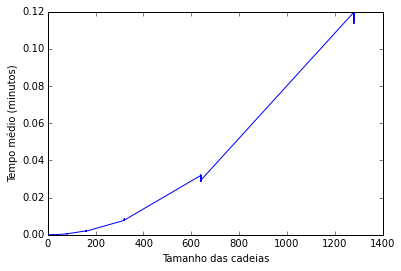

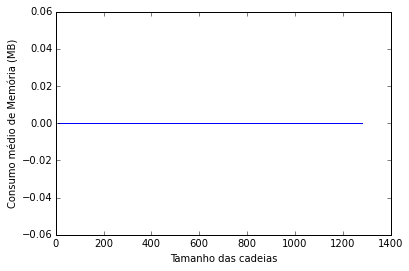

In [12]:
import matplotlib.pyplot as plt


plt.figure(1)
# Size X Time
plt.plot(linear[0], linear[1])
plt.ylabel(u"Tempo médio (minutos)")
plt.xlabel(u"Tamanho das cadeias")

# Size i X Memory
plt.figure(2)
plt.plot(linear[0], linear[2])
plt.ylabel(u"Consumo médio de Memória (MB)")
plt.xlabel(u"Tamanho das cadeias")
plt.show()